# Project 1

Our dataset deals contains many sttributes that we will be using to find the most important factors in someone having diabetes. Diabetes is "a chronic disease that occurs either when the pancreas does not produce enough insulin or when the body cannot effectively use the insulin it produces"(World Health Organization). It is the seventh ranked cause of death in America(National Center for Health Statistics). Our dataset has 11 attributes as follows:

* `Pregnancies` - The number of pregnancies a person has had.
* `Glucose` - Glucose levels (blood sugar levels) refer to the amount of glucose (a type of sugar) present in a person's blood, (mg/dL).
* `DiaBloodPressurestolic`- The pressure a person's blood is pushing against their artery walls when the heart beats
* `Skinfold` - The measurement areas of skin that naturally fold, often used to measure body fat thickness
* `Insulin`- Insulin levels(the amount of insulin present in the bloodstream). Insulin regulates blood sugar levels by facilitating glucose uptake into cells.
* `BMI`- Body mass index is a measure that uses height and weight to estimate body fat. Formula: $ weight (kg) / height (m^2)$.
* `DiabetesPedigreeFunction`- Is a score used to understand genetic inheritance patterns and identify potential risk factors.
* `Age`- What age is the person?
* `Outcome`: Class variable of (0 or 1) indicating whether the patient has diabetes (yes = 1) or not (no = 0).


## Part 1: Data Summary

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, roc_curve
from yellowbrick.classifier import ROCAUC
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [7]:
filename='https://raw.githubusercontent.com/ChristianDLT2004/DataForCSCI381/refs/heads/main/diabetes.csv'
df = pd.read_csv(filename)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [9]:
# Data types for each attribute
print("--- Count for each Data type ---\n")
df.dtypes.value_counts()

--- Count for each Data type ---



int64      7
float64    2
Name: count, dtype: int64

In [10]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

There are no Nan values values that need to be imputed or filled.

## Part 2: EDA

In [11]:
#check to see if there are duplicates
x = sum(df.duplicated())
print(f"The are {x} duplicates.")

The are 0 duplicates.


In [12]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Insight:
1. Describe Each Feature:
    * Mean, STD:
        * The average glucose level in this dataset is approximately 120.9 mg/dL, with a standard deviation of about 31.9 mg/dL, suggesting a fairly wide spread."
    * Min and Max:
        * The number of pregnancies ranges from 0 to a maximum of 17. While 0 pregnancies is valid, 17 is quite high, indicating a wide range in patient history.
    * `Glucose`:
        * Normal glucose range from 70 to 100 mg/dL
        * Prediabetes glucose range from 100 to 125 mg/dL
        * Diabetes glucose range from 126 mg/dL or higher
        * The minimum glucose level in this dataset is 0. Which is very dangerous for a person and can lead to serious complications, including coma and even death.
        * We can assume that the '0' here likely represents a missing or unrecorded value.
        * The max of 199 mg/dL is very high and concerning. Which could be a sign of hyperglycemia (high blood sugar).
    * `BloodPressure`:
        * 'Systolic blood pressure' is the top number, it measures the pressure in the arteries when the heart beats. 'Diastolic blood pressure' is the bottom number, it measures the pressure when the heart rests between beats.
        * Normal blood pressure is around 120/80 mm Hg.
        * Low blood pressure is 90/60 mm Hg or lower. Any lower and it can be dangerous.
        * High Blood Pressure is around 140/90 mmHG or higer
        * Similar to glucose, a minimum blood pressure of 0 mm Hg can mean a person's heart has stopped.
        * We can assume that the '0' here likely represents missing data or an error in the reading.
    * `SkinThickness`:
        * A skin thickness of 0 mm is impossible.
        * The thinnest a skin can be is around 0.5 mm thick which are the eyelids.
        * This suggests missing data or error.
    * `Insulin`:
        * An insulin level of 0 mu U/ml is rare and usually associated with severe health conditions.
        * Another assumption could be missing data.
        * Normal insulin range can range from 5-15 μU/mL
        * Extremely high insulin levels like 846 μU/mL can suggest severe insulin resistance or a condition called hyperinsulinemia, where the body produces too much insulin.
    * `BMI`:
        * A BMI of 0 is impossible for a person.
        * Normal BMI ranges from 18.5 to 24.9.
        * Values below 18.5 are underweight, and above 25 are overweight/obese.
        * A max BMI of 67.1 is extremely high, indicating severe obesity, a major risk factor for type 2 diabetes.
        * The 0's could be indicated as missing values.
    * 25%, 50% (Median), 75% (Quartiles):
        * Insulin has a mean of ~80 but a median of ~30.5, indicating a strong positive skew with many lower values and some very high outliers.
        * It suggests that the distribution of these feature might be skewed.
2. Overall Observations:
   * Our initial thoughts are that the dataset appears to be relatively clean, but some features have values that might require attention due to their clinical impossibility.

In [13]:
df_numerical = df[['Pregnancies', 'Glucose', 'BloodPressure',
                  'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']]
df_categorical = df[['Outcome']]

In [14]:
print("--- Checking for Negative Values ---\n")

# List of numerical columns where negative values would be invalid
# 'Outcome' not included since it only 1 and 0 values.

found_negative_values = False

for col in df_numerical:
    # Select rows where the current column has a value less than 0
    negative_rows = df[df[col] < 0]

    if not negative_rows.empty:
        print(f"\n--- Found Negative Values in Column: '{col}' ---")
        print(negative_rows)
        found_negative_values = True
    else:
        print(f"No negative values found in column: '{col}'")

if not found_negative_values:
    print("\nConclusion: No negative values were found in any of the checked numerical columns.")
else:
    print("\nAction Required: Investigate these negative values as they likely indicate data errors.")

--- Checking for Negative Values ---

No negative values found in column: 'Pregnancies'
No negative values found in column: 'Glucose'
No negative values found in column: 'BloodPressure'
No negative values found in column: 'SkinThickness'
No negative values found in column: 'Insulin'
No negative values found in column: 'BMI'
No negative values found in column: 'DiabetesPedigreeFunction'
No negative values found in column: 'Age'

Conclusion: No negative values were found in any of the checked numerical columns.


In [15]:
print("--- Checking for zero Values ---\n")

cols_to_check_for_zeros = ['Glucose', 'BloodPressure',
                           'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

total_rows = len(df)
found_zeros = False

print(f"Total number of rows in the dataset: {total_rows}\n")

for col in cols_to_check_for_zeros:
    zero_count = (df[col] == 0).sum()

    if zero_count > 0:
        found_zeros = True
        percentage_zeros = (zero_count / total_rows) * 100
        print(f"Column '{col}':")
        print(f"  - Number of 0 values: {zero_count}")
        print(f"  - Percentage of 0 values: {percentage_zeros:.2f}%")
        print("-" * 30)
    else:
        print(f"Column '{col}': No 0 values found (excluding valid 0s like in 'Pregnancies').")
        print("-" * 30)

if not found_zeros:
    print("\nConclusion: No problematic zero values were found in the specified columns.")
else:
    print("\nConclusion: Problematic zero values were found. These will need to be addressed during feature engineering/imputation.")

--- Checking for zero Values ---

Total number of rows in the dataset: 768

Column 'Glucose':
  - Number of 0 values: 5
  - Percentage of 0 values: 0.65%
------------------------------
Column 'BloodPressure':
  - Number of 0 values: 35
  - Percentage of 0 values: 4.56%
------------------------------
Column 'SkinThickness':
  - Number of 0 values: 227
  - Percentage of 0 values: 29.56%
------------------------------
Column 'Insulin':
  - Number of 0 values: 374
  - Percentage of 0 values: 48.70%
------------------------------
Column 'BMI':
  - Number of 0 values: 11
  - Percentage of 0 values: 1.43%
------------------------------
Column 'DiabetesPedigreeFunction': No 0 values found (excluding valid 0s like in 'Pregnancies').
------------------------------
Column 'Age': No 0 values found (excluding valid 0s like in 'Pregnancies').
------------------------------

Conclusion: Problematic zero values were found. These will need to be addressed during feature engineering/imputation.


--- Histograms of Numerical Features ---



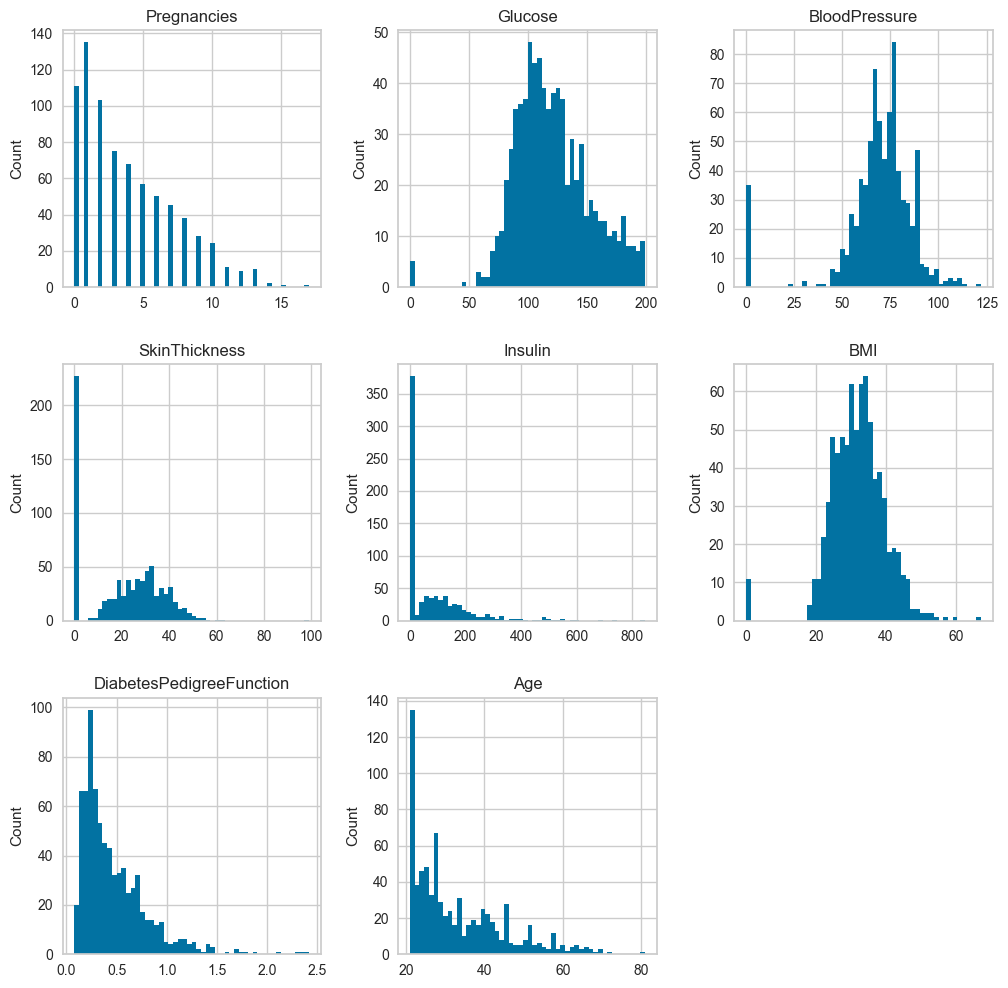

In [16]:
print("--- Histograms of Numerical Features ---\n")
axes = df_numerical.hist(bins=50, figsize=(12,12))
# To iterate through all the plots
for ax in axes.flatten():
    ax.set_ylabel('Count')
plt.show()

--- Plotbox of Numerical Features ---



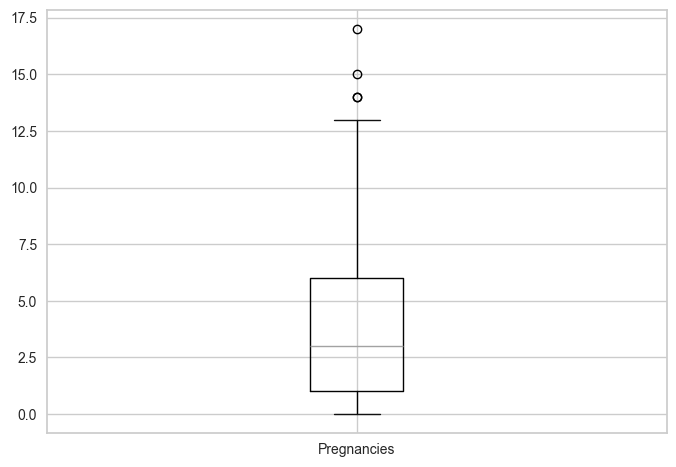

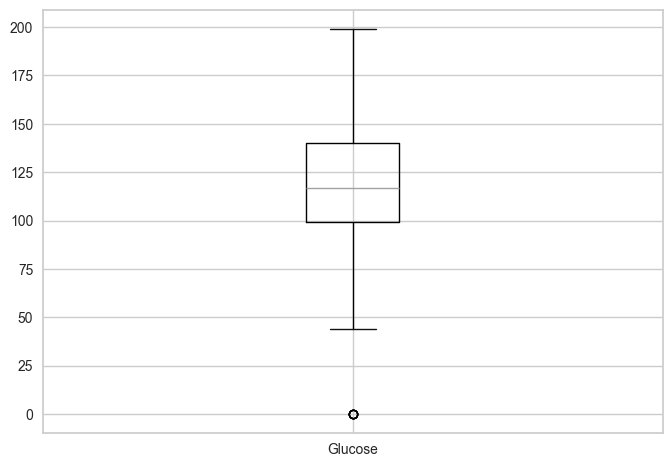

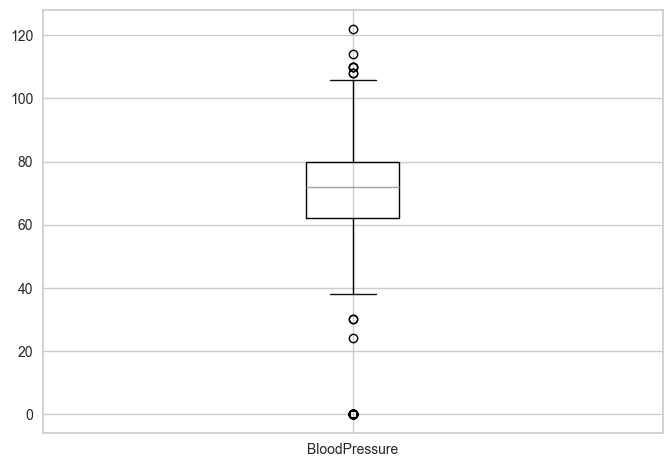

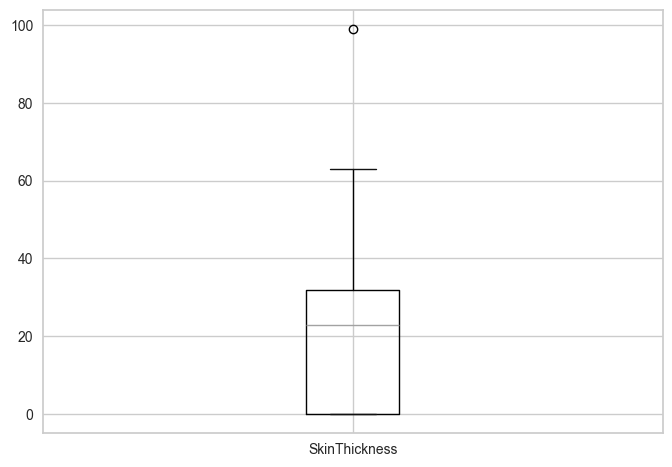

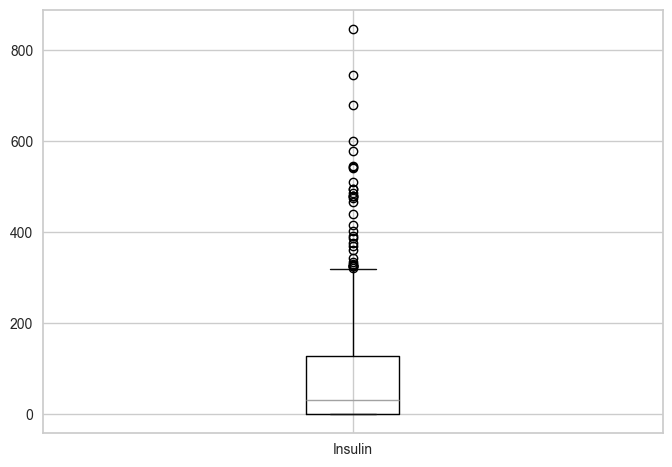

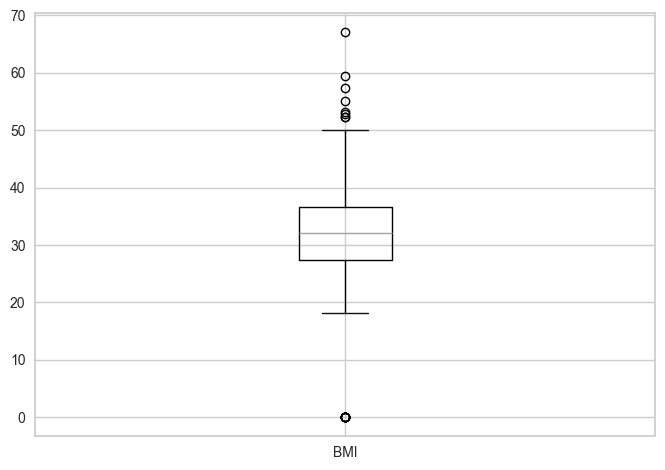

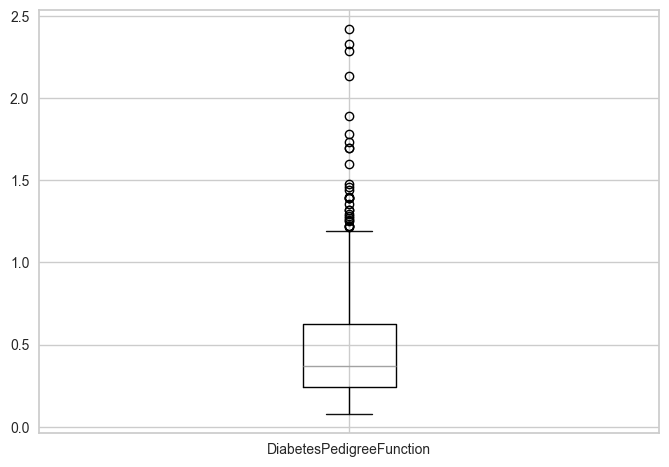

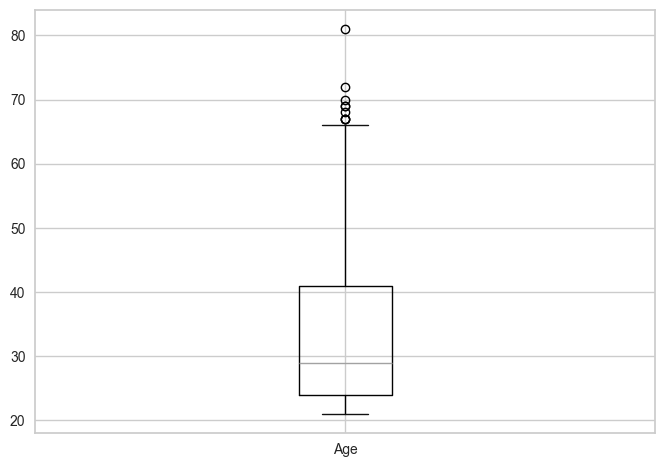

In [17]:
# for col_name in df_numerical:
print("--- Plotbox of Numerical Features ---\n")
for col in df_numerical:
  df_numerical.boxplot(column=col)
  plt.show()

There are a lot of outliers found in our box plots, so the next steps is possibly getting rid of all these outliers to able to run logistic regression.

* There is something most likely wrong with skinfold and insulin as they contain 0, but upon further research this is impossible.
* This will be changed to Nan when performing Feature Engineering and Imputation.

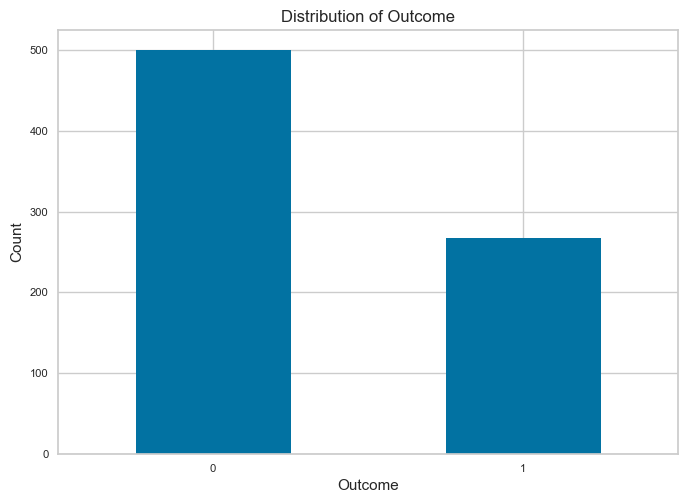

In [18]:
for col_name in df_categorical:
# rot=0 to keep labels horizontal
  df_categorical[col_name].value_counts().plot(kind='bar', fontsize = 8, rot=0)
  plt.title(f'Distribution of {col_name}')
  plt.ylabel('Count')
  plt.show()

There is a lot more 0 than 1 in 'class', which may cause our models to be bias towards the 0(the majority class).

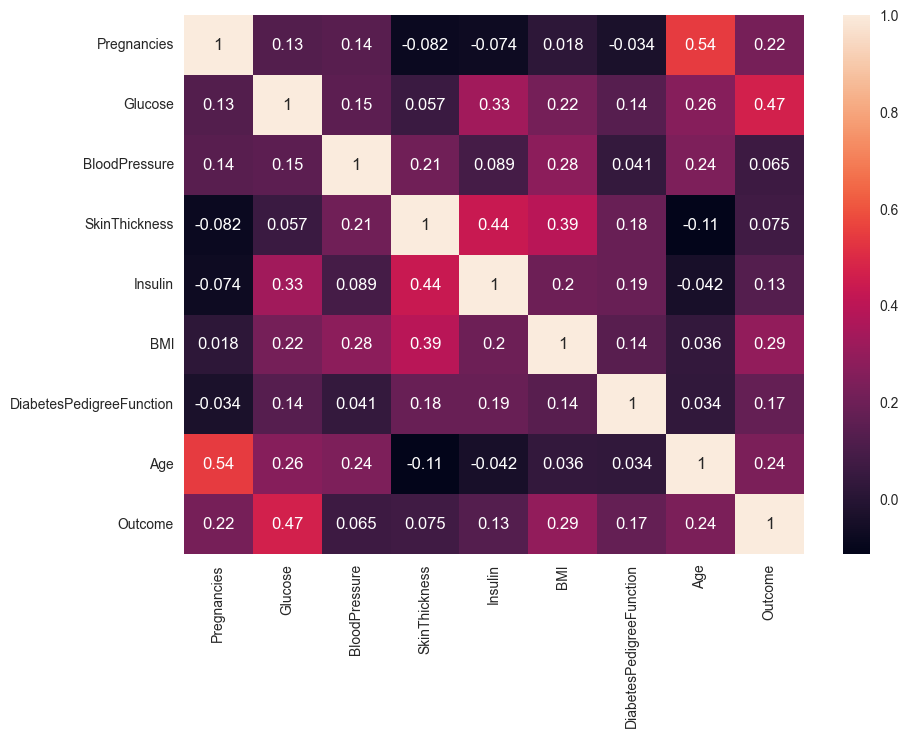

In [19]:
corrMatrix = df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age','Outcome']].corr()
plt.figure(figsize=(10,7))
sns.heatmap(corrMatrix, annot=True)
plt.show()

* According to this, glucose levels, age, and bmi is found to be most correlated with class.
* Pregnancies and Age are strongly correlated with each other.
* The next step will to try and see if removing outliers, will help increase the correlations with class.

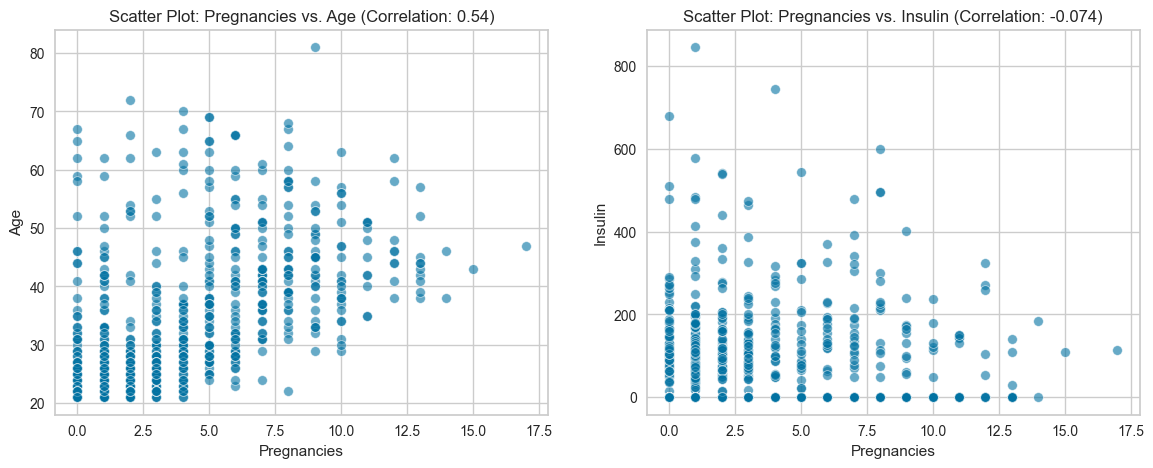

In [20]:
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1) # 1st plot
sns.scatterplot(x='Pregnancies', y='Age', data=df, alpha=0.6)
plt.title('Scatter Plot: Pregnancies vs. Age (Correlation: 0.54)')
plt.xlabel('Pregnancies')
plt.ylabel('Age')

plt.subplot(1, 2, 2) # 2nd plot
sns.scatterplot(x='Pregnancies', y='Insulin', data=df, alpha=0.6)
plt.title('Scatter Plot: Pregnancies vs. Insulin (Correlation: -0.074)')
plt.xlabel('Pregnancies')
plt.ylabel('Insulin')

plt.show()

## Part 3: Data Preperation

In [21]:
#create a copy of the dataframe with selected columns
df_cleaned = df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']].copy()

In [22]:
print("--- df_cleaned Info ---\n")
df_cleaned.info()

--- df_cleaned Info ---

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [23]:
#Since these values are impossible, fill with Nan
cols_to_impute_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df_cleaned[cols_to_impute_zeros] = df_cleaned[cols_to_impute_zeros].replace(0, np.nan)

In [24]:
print("--- After replacing 0s with NaN in df_cleaned ---\n")
df_cleaned.isnull().sum()

--- After replacing 0s with NaN in df_cleaned ---



Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [25]:
print("--- df_cleaned.describe() after NaN replacement ---\n")
df_cleaned.describe()

--- df_cleaned.describe() after NaN replacement ---



,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.535641,12.382158,10.476982,118.775855,6.924988,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,76.250000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [26]:
print("--- Re-Checking for zero Values ---\n")

remaining_zeros_found = False

for col in cols_to_impute_zeros:
    # Count how many 0s are left in each of these columns in df_cleaned
    zero_count = (df_cleaned[col] == 0).sum()

    if zero_count > 0:
        print(f"WARNING: Column '{col}' still has {zero_count} zero values after replacement.")
        remaining_zeros_found = True
    else:
        print(f"Column '{col}': No 0 values found. (Replacement successful)")

if not remaining_zeros_found:
    print("\nConfirmation: All problematic 0 values have been successfully replaced with NaN.")
else:
    print("\nAction Required: Investigate why zeros remain in the listed columns.")

--- Re-Checking for zero Values ---

Column 'Glucose': No 0 values found. (Replacement successful)
Column 'BloodPressure': No 0 values found. (Replacement successful)
Column 'SkinThickness': No 0 values found. (Replacement successful)
Column 'Insulin': No 0 values found. (Replacement successful)
Column 'BMI': No 0 values found. (Replacement successful)

Confirmation: All problematic 0 values have been successfully replaced with NaN.


In [27]:
print("--- Also checking NaN counts for confirmation ---\n")
df_cleaned[cols_to_impute_zeros].isnull().sum()

--- Also checking NaN counts for confirmation ---



Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
dtype: int64

In [28]:
def remove_outliers_iqr(df, threshold=1.5):
    df_numeric = df.select_dtypes(include=['number'])
    q1 = df_numeric.quantile(0.25)
    q3 = df_numeric.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - threshold * iqr
    upper_bound = q3 + threshold * iqr
    return df[((df_numeric >= lower_bound) & (df_numeric <= upper_bound)).all(axis=1)]
df_cleaned = remove_outliers_iqr(df_cleaned)

In [29]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 338 entries, 3 to 765
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               338 non-null    int64  
 1   Glucose                   338 non-null    float64
 2   BloodPressure             338 non-null    float64
 3   SkinThickness             338 non-null    float64
 4   Insulin                   338 non-null    float64
 5   BMI                       338 non-null    float64
 6   DiabetesPedigreeFunction  338 non-null    float64
 7   Age                       338 non-null    int64  
 8   Outcome                   338 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 26.4 KB


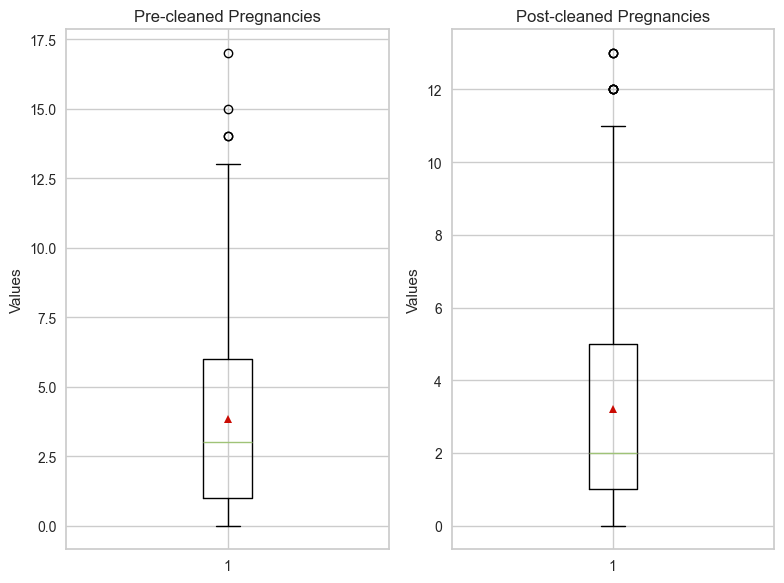

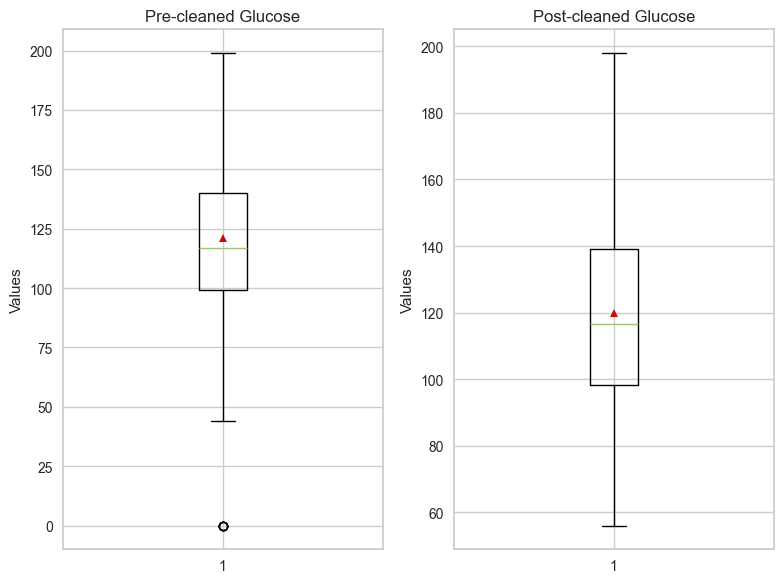

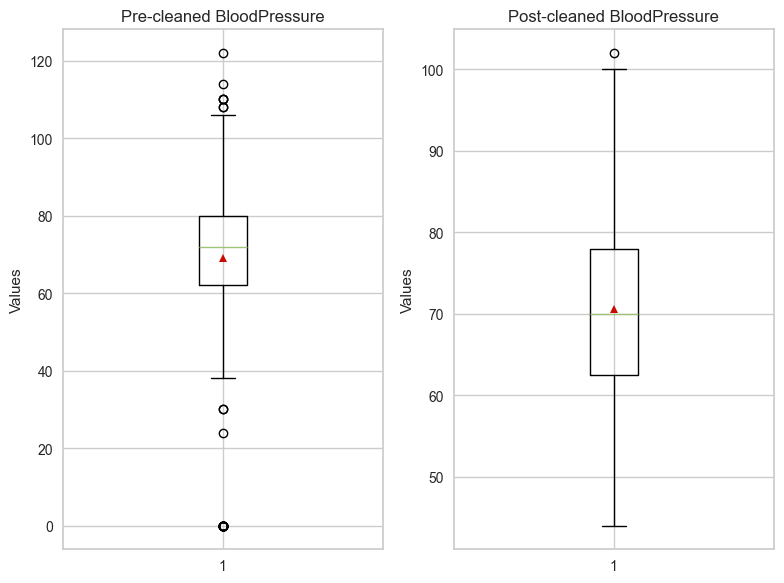

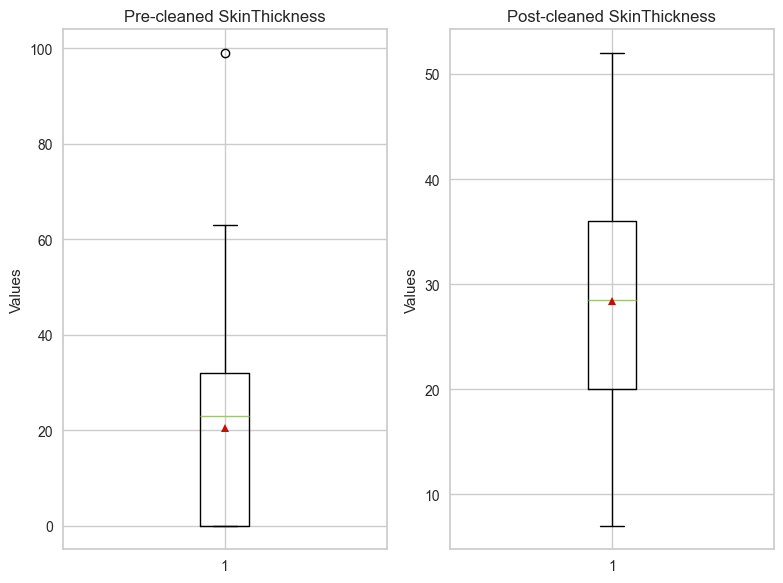

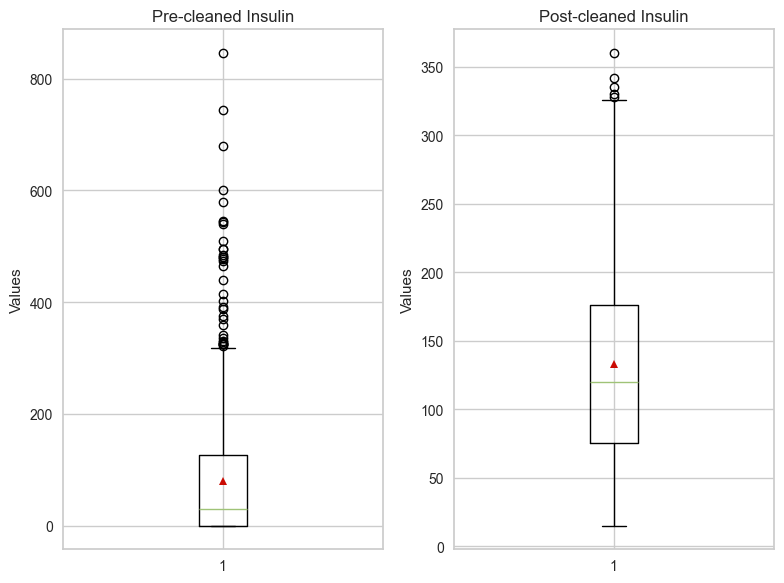

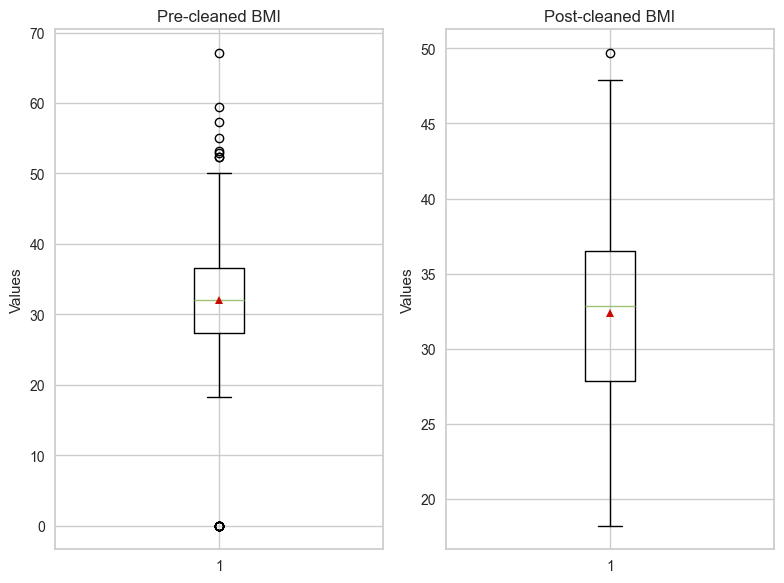

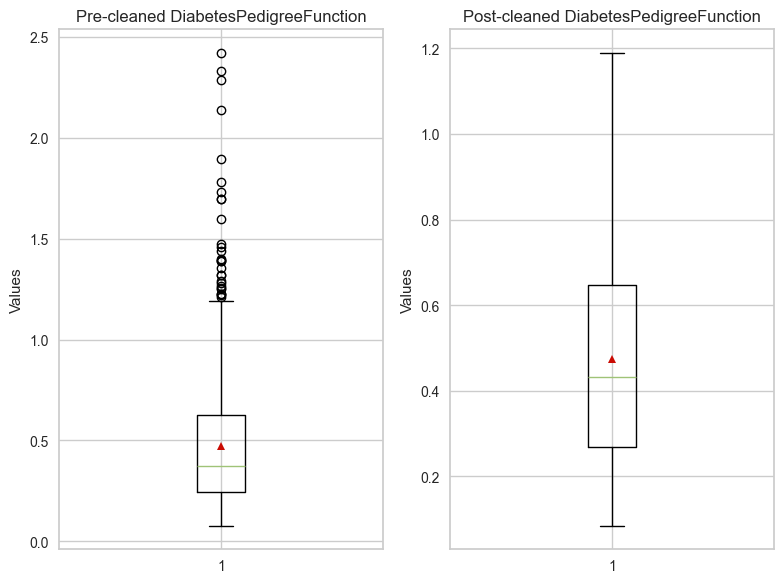

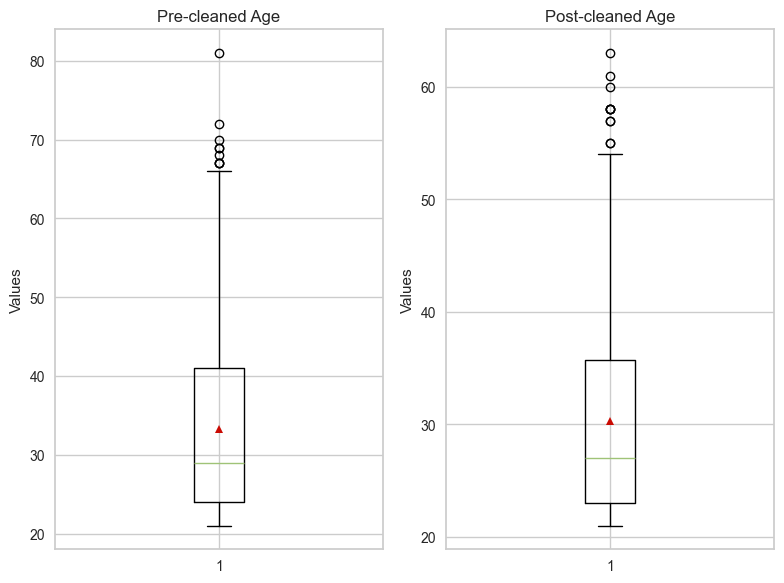

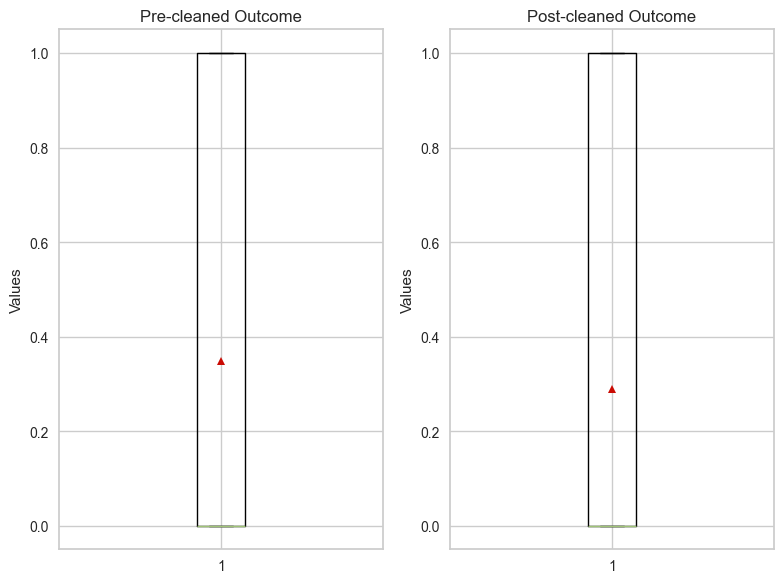

In [30]:
for i in df_cleaned:
  # Create the figure and subplots
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 6))

  # Create box plot on the first subplot
  ax1.boxplot(df[i], showmeans=True)
  ax1.set_title('Pre-cleaned ' + i)
  ax1.set_ylabel('Values')

  # Create box plot on the second subplot
  ax2.boxplot(df_cleaned[i], showmeans=True)
  ax2.set_title('Post-cleaned ' + i)
  ax2.set_ylabel('Values')

  # Adjust layout and display
  plt.tight_layout()
  plt.show()

In [31]:
# we don't have this feature anymore - replace it with what?
# df['class'].value_counts().plot(kind='bar', fontsize=8, rot=0)
# plt.show()

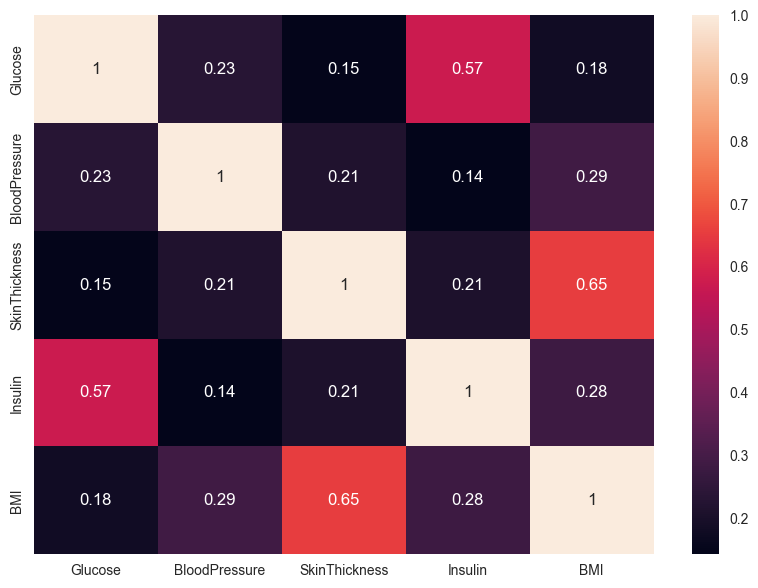

In [32]:
corrMatrix1 = df_cleaned[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].corr()
plt.figure(figsize=(10,7))
sns.heatmap(corrMatrix1, annot=True)
plt.show()

This approach drops too much data and makes our correlations with class decrease mostly. Something interesting I found is that this approach ends up decreasing the count of people that had diabetes, but not as much those that did not have diabetes. This makes sense as outliers in glucose levels indicate high blood sugar and high blood sugar are common in people with diabetes. In this case, outliers should be kept in our data due to their correlation with diabetes.

The next approach will be to use KBinsDiscretizer to deal with outliers and use KNNImputer to fill the wrong values in 'skinfold' and 'insulin'.

In [33]:
df_cleaned1=df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age','Outcome']].copy()

In [34]:
from sklearn.impute import KNNImputer

#Since these values are impossible, fill with Nan
columns_with_missing = ['Glucose', 'SkinThickness']
df_cleaned1[columns_with_missing] = df_cleaned1[columns_with_missing].replace(0, np.nan)

#Use KNNImputer
imputer = KNNImputer(n_neighbors=5, weights="uniform")
df_cleaned1 = pd.DataFrame(imputer.fit_transform(df_cleaned1), columns=df_cleaned1.columns)

In [35]:
df_cleaned1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    float64
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    float64
 8   Outcome                   768 non-null    float64
dtypes: float64(9)
memory usage: 54.1 KB


In [36]:
df_cleaned1[columns_with_missing].describe()

,Glucose,SkinThickness
count,768.000000,768.000000
mean,121.671615,29.017969
std,30.474936,9.327999
min,44.000000,7.000000
25%,99.000000,22.650000
50%,117.000000,29.000000
75%,140.250000,35.000000
max,199.000000,99.000000


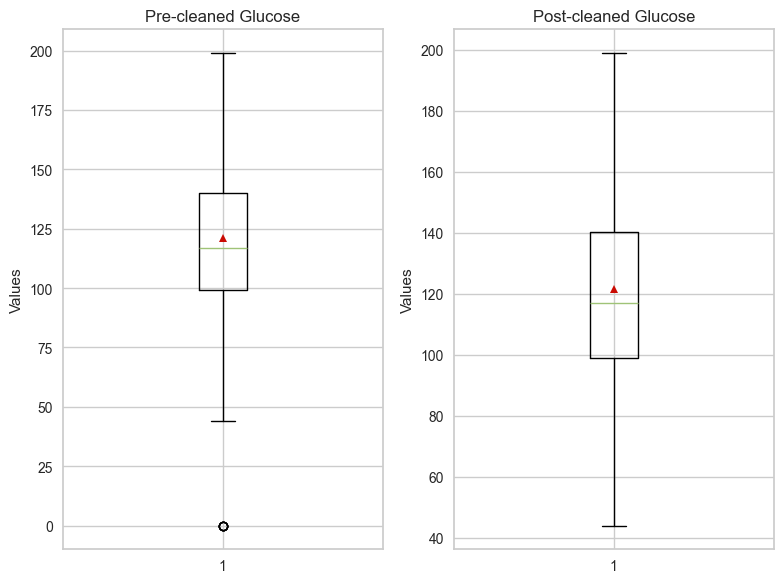

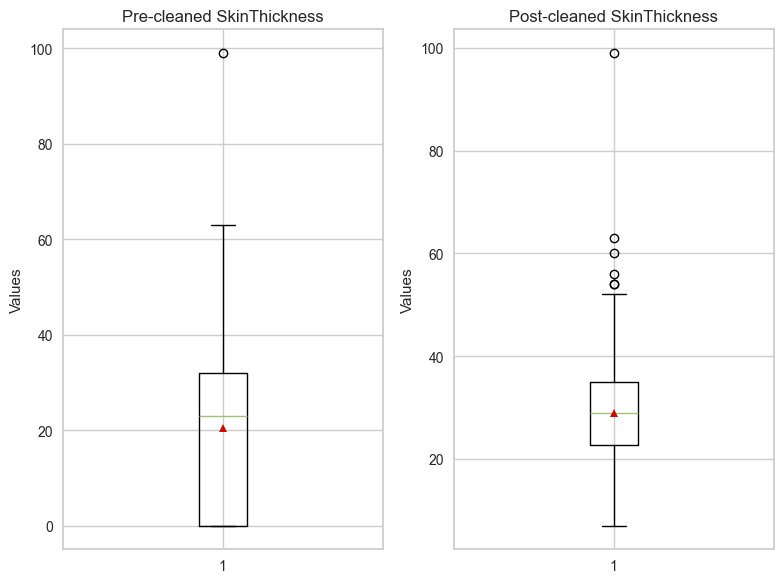

In [37]:
for i in columns_with_missing:
  # Create the figure and subplots
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 6))

  # Create box plot on the first subplot
  ax1.boxplot(df[i], showmeans=True)
  ax1.set_title('Pre-cleaned ' + i)
  ax1.set_ylabel('Values')

  # Create box plot on the second subplot
  ax2.boxplot(df_cleaned1[i], showmeans=True)
  ax2.set_title('Post-cleaned ' + i)
  ax2.set_ylabel('Values')

  # Adjust layout and display
  plt.tight_layout()
  plt.show()

* We see that we fixed the outlier for `Glucose` when replacing 0's with NaN
* We see that more outliers in `SkinThickness` were added when replacing 0's with NaN

In [38]:
from sklearn.preprocessing import KBinsDiscretizer
kbd1 = KBinsDiscretizer(n_bins=2, encode='ordinal', strategy='kmeans')

# Apply to a single column (e.g., 'income') and transform
df_cleaned1['insulin_binned'] = kbd1.fit_transform(df_cleaned1[['Insulin']])

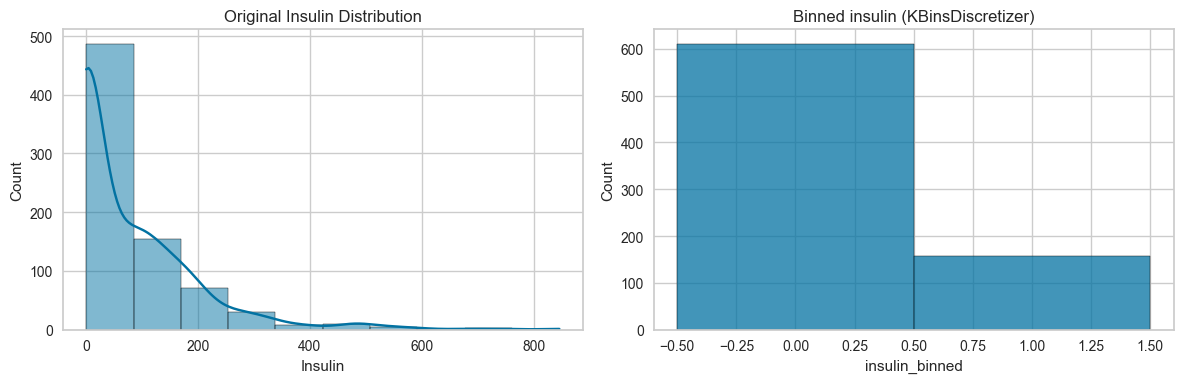

In [39]:
# Plot original vs. binned
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

# Original distribution
sns.histplot(df_cleaned1['Insulin'], bins=10, kde=True, ax=ax[0])
ax[0].set_title('Original Insulin Distribution')

# Binned distribution
sns.histplot(df_cleaned1['insulin_binned'], bins=6, discrete=True, ax=ax[1])
ax[1].set_title('Binned insulin (KBinsDiscretizer)')

plt.tight_layout()
plt.show()

In [40]:
from sklearn.preprocessing import KBinsDiscretizer
kbd2 = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='kmeans')  # or 'quantile', 'kmeans'

# Apply to a single column (e.g., 'income') and transform
df_cleaned1['glucose_binned'] = kbd2.fit_transform(df_cleaned1[['Glucose']])

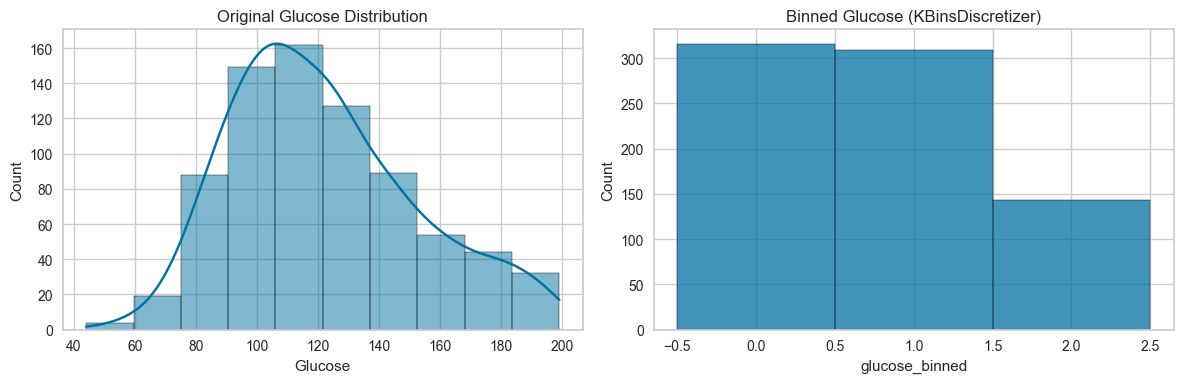

In [41]:
# Plot original vs. binned
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

# Original distribution
sns.histplot(df_cleaned1['Glucose'], bins=10, kde=True, ax=ax[0])
ax[0].set_title('Original Glucose Distribution')

# Binned distribution
sns.histplot(df_cleaned1['glucose_binned'], bins=3, discrete=True, ax=ax[1])
ax[1].set_title('Binned Glucose (KBinsDiscretizer)')

plt.tight_layout()
plt.show()

In [42]:
df_cleaned1.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,insulin_binned,glucose_binned
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.671615,69.105469,29.017969,79.799479,31.992578,0.471876,33.240885,0.348958,0.204427,0.774740
std,3.369578,30.474936,19.355807,9.327999,115.244002,7.884160,0.331329,11.760232,0.476951,0.403545,0.740018
min,0.000000,44.000000,0.000000,7.000000,0.000000,0.000000,0.078000,21.000000,0.000000,0.000000,0.000000
25%,1.000000,99.000000,62.000000,22.650000,0.000000,27.300000,0.243750,24.000000,0.000000,0.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,30.500000,32.000000,0.372500,29.000000,0.000000,0.000000,1.000000
75%,6.000000,140.250000,80.000000,35.000000,127.250000,36.600000,0.626250,41.000000,1.000000,0.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000,1.000000,2.000000


Upon taking care of incorect values by imputing and creating bins for glucose and insuling for thier outliers, there has a huge increase in the correlations with class. The new binned variables have a greater than .3 correlation with class meaning they are highly correlated.

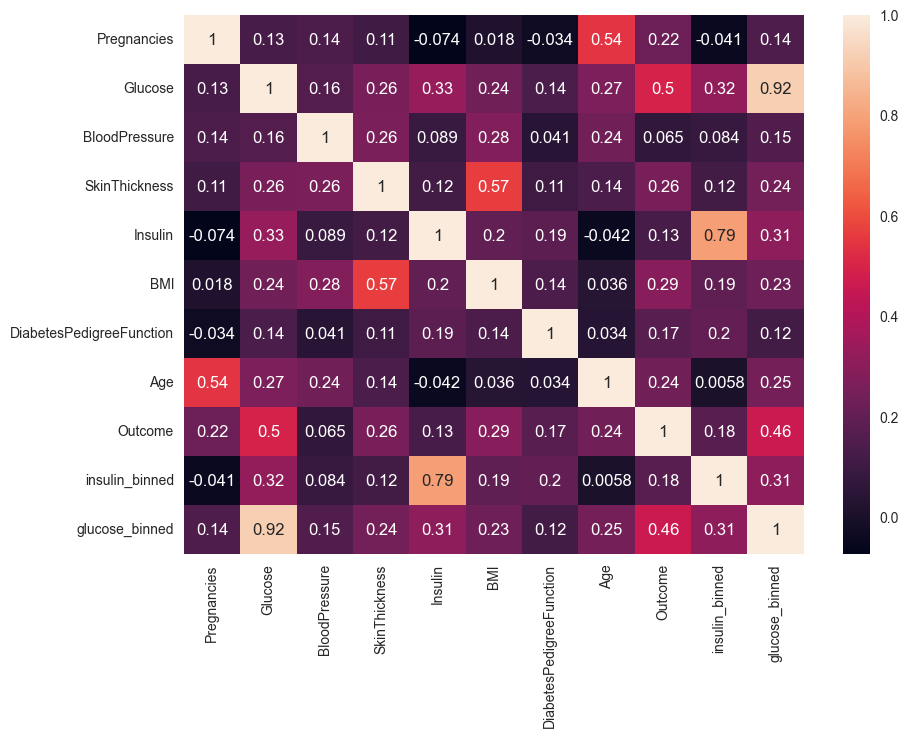

In [43]:
corrMatrix1 = df_cleaned1.corr()
plt.figure(figsize=(10,7))
sns.heatmap(corrMatrix1, annot=True)
plt.show()

## Part 4: Feature Engineering

### Imputation

[Pregnancy and Insulin](https://pmc.ncbi.nlm.nih.gov/articles/PMC6885766/)

*Maternal hyperglycemia leads to fetal hyperglycemia and hyperinsulinemia, which cause fetal macrosomia*

A mother with high blood pressure will produce high levels of glucose and the fetus in an attempt to control and use this extra glucose will produce insulin. Which allows it to grow, but if this can result in the baby growing more than normal and can create complications during delivery.


Pregnancies and age

- Pregancies | Discrete
- Age        | Discrete

Skin Thickness and BMI

## Part 5: Feature Selection:

### Scaling

### Wrapper Methods using Recursive Feature Elimination (RFE)

## Part 8: References
* <a href = "https://www.mayoclinic.org/diseases-conditions/gestational-diabetes/symptoms-causes/syc-20355339"> Pregnancy and High Glucose </a>
* <a href = "https://www.cdc.gov/maternal-infant-health/pregnancy-weight/index.html"> Pregnancy and High BMI </a>
* <a href = "https://www.marchofdimes.org/find-support/topics/pregnancy/high-blood-pressure-during-pregnancy"> Pregnancy and High Blood Pressure </a>
* <a href = "https://arismuhandisin.medium.com/understanding-wrapper-methods-in-machine-learning-a-guide-to-feature-selection-23f71059abf8"> Understanding Wrapper Methods </a>